In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os

In [2]:
dataset_path = "/mnt/sdb1/datasets/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset"
img_path = "train/1-s2.0-S0929664620300449-gr2_lrg-b.jpg"

img_full_path = os.path.join(dataset_path, img_path)

## Adaptive Histogram Eq.

In [3]:
img = cv2.imread(img_full_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

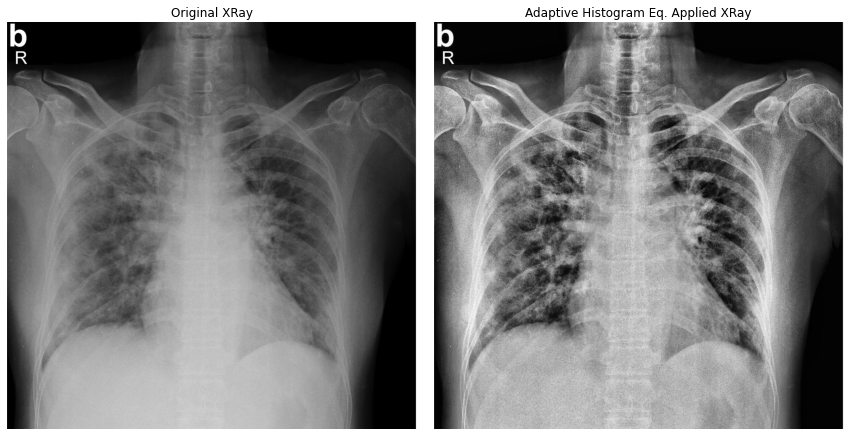

In [4]:
clip_limit = 3.0
tile_grid_size = (10, 10)
clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

img_clahe = clahe.apply(img_gray)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(img_gray, cmap="gray")
axes[0].set_title("Original XRay")
axes[1].imshow(img_clahe, cmap="gray")
axes[1].set_title("Adaptive Histogram Eq. Applied XRay")
[axis.axis("off") for axis in axes]
plt.tight_layout()
plt.show()

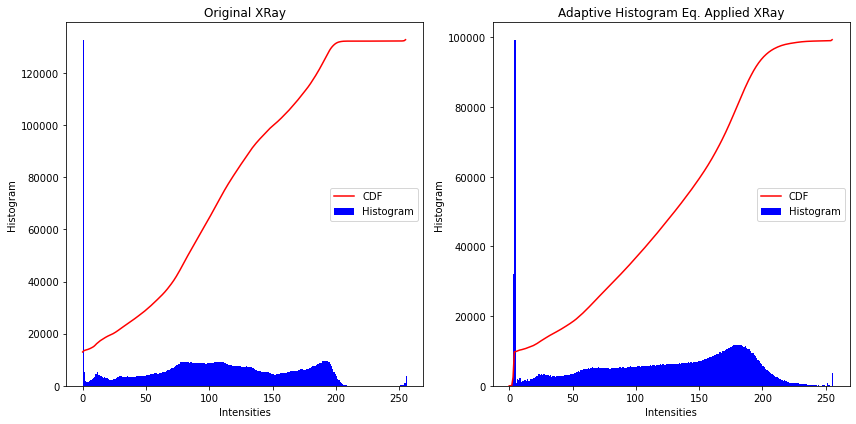

In [5]:
hist_orig, bins = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
cdf_orig = hist_orig.cumsum()
cdf_norm_orig = cdf_orig * hist_orig.max() / cdf_orig.max()

hist_clahe, bins = np.histogram(img_clahe.flatten(), bins=256, range=[0, 256])
cdf_clahe = hist_clahe.cumsum()
cdf_norm_clahe = cdf_clahe * hist_clahe.max() / cdf_clahe.max()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].hist(img_gray.flatten(), bins=256, range=[0, 256], color="b")
axes[0].plot(cdf_norm_orig, color="r")
axes[0].set_title("Original XRay")
axes[1].hist(img_clahe.flatten(), bins=256, range=[0, 256], color="b")
axes[1].plot(cdf_norm_clahe, color="r")
axes[1].set_title("Adaptive Histogram Eq. Applied XRay")
for axis in axes:
    axis.set_ylabel("Histogram")
    axis.set_xlabel("Intensities")
    axis.legend(("CDF", "Histogram"), loc="best")
plt.tight_layout()
plt.show()

## Median Filter

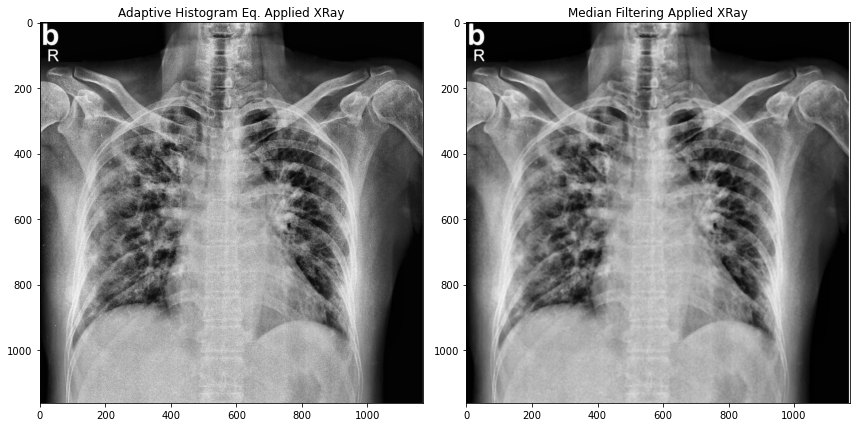

In [6]:
img_median = cv2.medianBlur(img_clahe, 5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(img_clahe, cmap="gray")
axes[0].set_title("Adaptive Histogram Eq. Applied XRay")
axes[1].imshow(img_median, cmap="gray")
axes[1].set_title("Median Filtering Applied XRay")
[axis.axis("off") for caxis in axes]
plt.tight_layout()
plt.show()

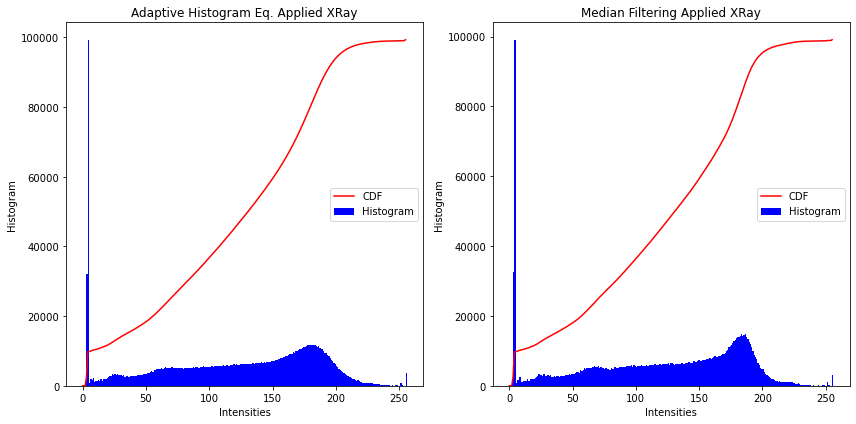

In [7]:
hist_median, bins = np.histogram(img_median.flatten(), bins=256, range=[0, 256])
cdf_median = hist_median.cumsum()
cdf_norm_median = cdf_median * hist_median.max() / cdf_median.max()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].hist(img_clahe.flatten(), bins=256, range=[0, 256], color="b")
axes[0].plot(cdf_norm_clahe, color="r")
axes[0].set_title("Adaptive Histogram Eq. Applied XRay")
axes[1].hist(img_median.flatten(), bins=256, range=[0, 256], color="b")
axes[1].plot(cdf_norm_median, color="r")
axes[1].set_title("Median Filtering Applied XRay")
for axis in axes:
    axis.set_ylabel("Histogram")
    axis.set_xlabel("Intensities")
    axis.legend(("CDF", "Histogram"), loc="best")
plt.tight_layout()
plt.show()

## Contrast Strecthing

In [8]:
from skimage import exposure

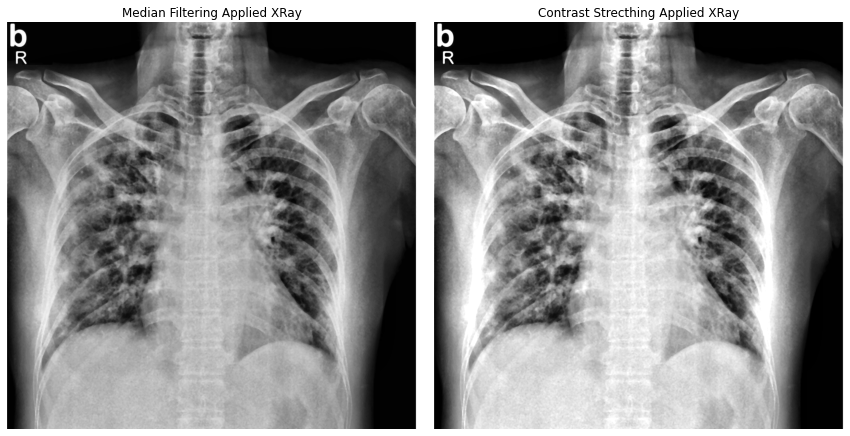

In [9]:
p2 = np.percentile(img_median, 2)
p98 = np.percentile(img_median, 98)
img_stretch = exposure.rescale_intensity(img_median, in_range=(p2, p98))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].imshow(img_median, cmap="gray")
axes[0].set_title("Median Filtering Applied XRay")
axes[1].imshow(img_stretch, cmap="gray")
axes[1].set_title("Contrast Strecthing Applied XRay")
[axis.axis("off") for axis in axes]
plt.tight_layout()
plt.show()

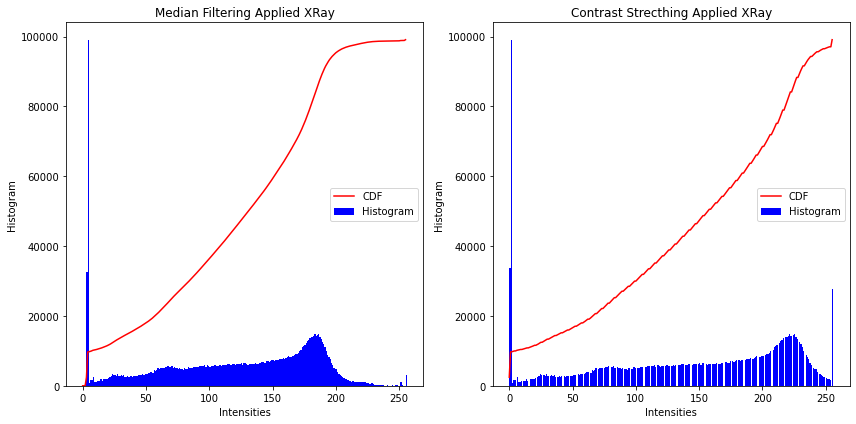

In [10]:
hist_stretch, bins = np.histogram(img_stretch.flatten(), bins=256, range=[0, 256])
cdf_stretch = hist_stretch.cumsum()
cdf_norm_stretch = cdf_stretch * hist_stretch.max() / cdf_stretch.max()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].hist(img_median.flatten(), bins=256, range=[0, 256], color="b")
axes[0].plot(cdf_norm_median, color="r")
axes[0].set_title("Median Filtering Applied XRay")
axes[1].hist(img_stretch.flatten(), bins=256, range=[0, 256], color="b")
axes[1].plot(cdf_norm_stretch, color="r")
axes[1].set_title("Contrast Strecthing Applied XRay")
for axis in axes:
    axis.set_ylabel("Histogram")
    axis.set_xlabel("Intensities")
    axis.legend(("CDF", "Histogram"), loc="best")
plt.tight_layout()
plt.show()

## Plot Results

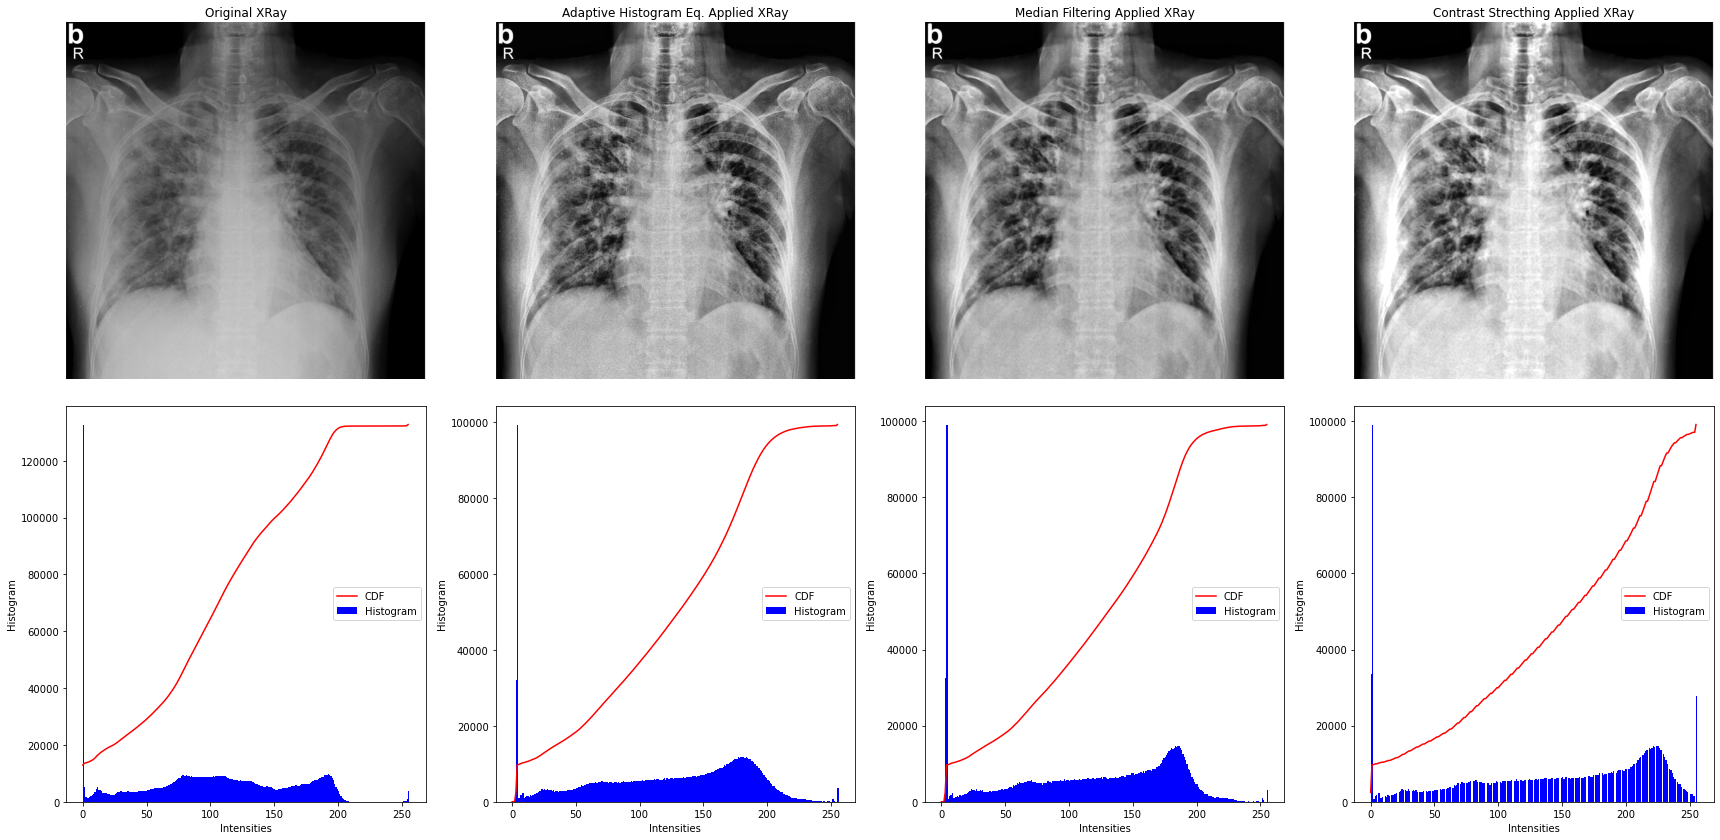

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12))
axes[0, 0].imshow(img_gray, cmap="gray")
axes[0, 0].set_title("Original XRay")
axes[0, 1].imshow(img_clahe, cmap="gray")
axes[0, 1].set_title("Adaptive Histogram Eq. Applied XRay")
axes[0, 2].imshow(img_median, cmap="gray")
axes[0, 2].set_title("Median Filtering Applied XRay")
axes[0, 3].imshow(img_stretch, cmap="gray")
axes[0, 3].set_title("Contrast Strecthing Applied XRay")

axes[1, 0].hist(img_gray.flatten(), bins=256, range=[0, 256], color="b")
axes[1, 0].plot(cdf_norm_orig, color="r")
axes[1, 1].hist(img_clahe.flatten(), bins=256, range=[0, 256], color="b")
axes[1, 1].plot(cdf_norm_clahe, color="r")
axes[1, 2].hist(img_median.flatten(), bins=256, range=[0, 256], color="b")
axes[1, 2].plot(cdf_norm_median, color="r")
axes[1, 3].hist(img_stretch.flatten(), bins=256, range=[0, 256], color="b")
axes[1, 3].plot(cdf_norm_stretch, color="r")

[axis.axis("off") for axis in axes[0]]
for axis in axes[1]:
    axis.set_ylabel("Histogram")
    axis.set_xlabel("Intensities")
    axis.legend(("CDF", "Histogram"), loc="best")

plt.tight_layout()
plt.savefig("crx_norm_results.png", dpi=300)
plt.show()